#Cal Grant Predictor
#Authors: Vladimir Kataev, Darshan Patel, Harjas Dhaliwal
#CS105- Winter 2023



---












#Introduction 
  As college students, we recognize the importance and urgency of financial aid programs that have a direct impact on individuals and families who are facing difficulties in paying for the increasing expenses of education. Many students belong to low to middle-income backgrounds which present significant economic challenges when pursuing higher education. For many students, financial aid programs are the difference between attending college and being forced to forego higher education due to financial constraints.



---


 Our dataset came from the California Student Aid Commission (CSAC), It is comprised of several different datasets including FAFSA and Cal Grant applications, as well as data on financial aid awards and student demographics such as expected family contribution (EFC), income level, and educational background. The dataset has many different attributes, like the ones listed above however a large portion of them were hidden observations, such as GPA, Parental Income, and Age. This dataset includes numbers from several years ago (since the start of the Cal Grant Program in 2000) before we began to clean the data. Thus, making it easier to build a predictive model because we have enough data to follow trends and build predictions. Making it a valuable resource for analyzing trends and patterns in financial aid distribution. We chose to focus on the past two years of the dataset to maintain relevance and accuracy in our analysis.



# https://www.csac.ca.gov/data-dashboards
# Offered grants / Total applications 




---




# Install all the frameworks


Here we Installed all of the necessary framework and toolkits to effectively implement and utilize predictive analytics techniques in our time series forecasting model. We then gathered and preprocessed the relevant data, including historical financial aid application numbers and demographic and economic data.

In [1]:
!pip install skforecast
!pip install statsmodels
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


from statsmodels.tsa.arima.model import ARIMA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# The marginal probabilities file

After consolidating our datafile and creating sums 3D coordinates for the number of Cal grant A,B,C. We performed a series of data analyses to identify patterns and trends in the demand for financial aid programs.

In [2]:
print("The marginal file")
files.upload()
df = pd.read_csv('/content/marginals.csv')
# place = {CCC, CSU, UC}, parentalEducation = {"college" (or more), "highSchool" (or less), }

The marginal file


Saving marginals.csv to marginals.csv


In [3]:
df.head()

,place,parentalEducation,studentYear,cga,cgb,cgc,applications
0,CCC,college,freshman,8419,53272,402,150532
1,CCC,college,sophomore,7565,32227,680,77343
2,CCC,college,junior,2930,4917,226,39914
3,CCC,college,senior,2793,1198,37,12496
4,CCC,highSchool,freshman,7915,84730,691,223590


# Now we find the probability of a grant

Here we implemented an algorithm for calculating the probabilities of each grant being awarded based on various factors such as parental education level, college type applying to, and year of entrance into college. This algorithm can help identify which grants are most likely to be awarded to a particular student, based on their unique circumstances and characteristics.

In [4]:
possibleParental = ["college", "highSchool", "unknown"]
possiblePlace = ["CCC", "UC", "CSU"]
year = ["freshman", 'sophomore', 'junior', 'senior']

In [5]:
numeratorA  = 0
numeratorB  = 0
numeratorC  = 0
denominator = 0

print("Parental education (1-College or more, 2-High School or less, 3-unknown, 4-refuse to answer)")
p = input()
print("Place of education (1-CCC, 2-UC, 3-CSU, 4-refuse to answer)")
e = input()
print("Year of education (1-freshman, 2-sophomore, 3-junior, 4-senior, 5-refuse to answer)")
y = input()

if(p == "1"):
  possibleParental = ["college"]
elif(p == "2"):
  possibleParental = ["highSchool"]
elif(p == "3"):
  possibleParental = ["unknown"]
else:
  possibleParental = ["college", "highSchool", "unknown"]
    
if(e == "1"):
  possiblePlace = ["CCC"]
elif(e == "2"):
  possiblePlace = ["UC"]
elif( e == "3"):
  possiblePlace = ["CSU"]
else:
  possiblePlace = ["CCC", "UC", "CSU"]


if(y == "1"):
  year = ["freshman"]
elif(y == "2"):
  year = ["sophomore"]
elif(y == "3"):
  year = ["junior"]
elif(y == "4"):
  year = ["senior"]  
else:
  year = ["freshman", 'sophomore', 'junior', 'senior']




print(possibleParental, possiblePlace, year)

Parental education (1-College or more, 2-High School or less, 3-unknown, 4-refuse to answer)
1
Place of education (1-CCC, 2-UC, 3-CSU, 4-refuse to answer)
3
Year of education (1-freshman, 2-sophomore, 3-junior, 4-senior, 5-refuse to answer)
2
['college'] ['CSU'] ['sophomore']


This algorithm is designed to calculate the probabilities associated with receiving various forms of financial aid.

In [6]:
import math
for yr in year:
  for pl in possiblePlace:
    for par in possibleParental:
      rel = df[df["place"] == pl]
      rel = rel[rel[" studentYear"] == yr]
      rel = rel[rel[" parentalEducation"] == par]
      numeratorA += int(rel[" cga"])
      numeratorB += int(rel[" cgb"])
      numeratorC += int(rel[" cgc"])
      denominator += int(rel[" applications"])
      

n1 = (numeratorA / denominator)
n2 = (numeratorB / denominator)
n3 = (numeratorC / denominator)
print("P(grant A):", float(n1) , " P(grant B):", float(n2) , " P(grant C):", float(n3))

P(grant A): 0.18002622562497356  P(grant B): 0.2724504039592234  P(grant C): 0.0


# The time series prediction

In [7]:
print("The time series file")
files.upload()




The time series file


Saving Total_Apps_Vert_copy.csv to Total_Apps_Vert_copy.csv


{'Total_Apps_Vert_copy.csv': b'Month of Date App,Day of Date App,2021,2022,2023\r\nOctober,1,56661,19470,28969\r\nOctober,2,80084,40330,47464\r\nOctober,3,96039,56940,65801\r\nOctober,4,111940,73473,82255\r\nOctober,5,128514,89249,92581\r\nOctober,6,143783,103093,106010\r\nOctober,7,156896,113528,114950\r\nOctober,8,168360,122063,125281\r\nOctober,9,177567,130554,137133\r\nOctober,10,186095,140512,149638\r\nOctober,11,196482,151715,162213\r\nOctober,12,209075,163070,173849\r\nOctober,13,220801,175218,179971\r\nOctober,14,231944,185195,187708\r\nOctober,15,242468,192752,197233\r\nOctober,16,250538,199952,208390\r\nOctober,17,258131,209923,220654\r\nOctober,18,266831,221599,232486\r\nOctober,19,277588,231762,243370\r\nOctober,20,287496,243131,253160\r\nOctober,21,297684,250060,260356\r\nOctober,22,311428,256991,267668\r\nOctober,23,324822,264643,276742\r\nOctober,24,337298,274656,286836\r\nOctober,25,352802,286228,296447\r\nOctober,26,370635,297302,307201\r\nOctober,27,389770,307872,3171

The visualization below depicts current number of 2023 applications for financial aid. 

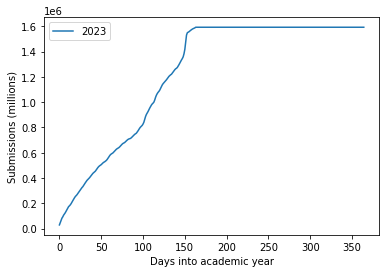

In [8]:
data = pd.read_csv("Total_Apps_Vert_copy.csv")
data['index'] = data.index
data["applied"] = data["2023"].diff()


fig, ax = plt.subplots()
ax.plot(data['2023'], label = "2023")
plt.ylabel("Submissions (millions)")
plt.xlabel("Days into academic year")
ax.legend()

The graph below visually displays the number of applications received each day, up until the present time. The point where the line on the graph levels off indicates precisely when we would initiate our Arima model to make predictions about future application rates

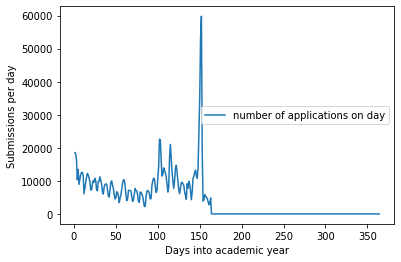

In [9]:
fig, ax = plt.subplots()

ax.plot(data['applied'], label = "number of applications on day")
plt.ylabel("Submissions per day")
plt.xlabel("Days into academic year")

ax.legend()

The visualization below demonstrates the technique allows for the comparison of testing and training data sets to evaluate the performance of our prediction algorithm. The gap in the trendline was implemented so that the testing was done on the future and not the next day.

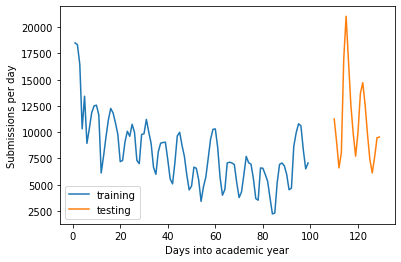

In [10]:
train = data[0:100]
test = data[110:130]
train.head()

fig, ax = plt.subplots()
train['applied'].plot(ax=ax, label = "training")
test['applied'].plot(ax=ax, label = "testing")
plt.ylabel("Submissions per day")
plt.xlabel("Days into academic year")

ax.legend()


This program implements Arima model predicts how many applications will be filled out per day for the remainder of 2023. By utilizing historical data and applying predictive analytics techniques, we can accurately forecast the demand for financial aid programs.

In [11]:
ARIMAmodel = ARIMA(train['applied'], order=(10,0,0))
ARIMAmodel = ARIMAmodel.fit()


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
steps = 165 - 100
predictions = ARIMAmodel.get_forecast(steps=steps)
predictions = predictions.conf_int(alpha = 0.15)
predictions.head()

,lower applied,upper applied
100,6661.585555,9388.866691
101,8866.875700,12670.567473
102,9001.875216,13389.157211
103,8224.354549,13020.864984
104,6749.019372,11746.176940


Here, we present the formal expansion of the prediction sum for students who are expected to apply through the end of this year. The training set is displayed until April, and subsequent predictions cover from April onwards. We emphasize that the best-fit line represents optimal accuracy, while both high and low ends denote possible boundaries in terms of student application rates.

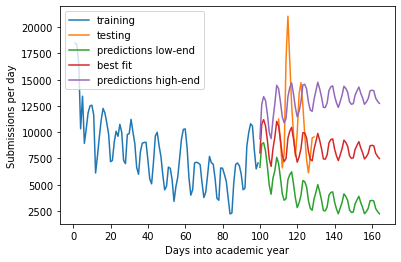

In [13]:
fig, ax = plt.subplots()
train['applied'].plot(ax=ax, label = "training")
test['applied'].plot(ax=ax, label = "testing")
#predictions[predictions["lower applied"] < 0] = 0
predictions["lower applied"].plot(ax=ax, label = 'predictions low-end')

predictions["mle"] = (predictions["upper applied"] + predictions["lower applied"]) / 2
predictions["mle"].plot(ax = ax, label = "best fit")
predictions["upper applied"].plot(ax=ax, label = 'predictions high-end')
plt.ylabel("Submissions per day")
plt.xlabel("Days into academic year")

ax.legend()

We see that the high-end is somewhat accurat, so from now we use that for our predictions for the whole year

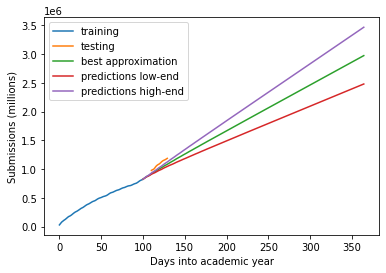

In [14]:
fig, ax = plt.subplots()


predictions = ARIMAmodel.get_forecast(365 - 100)
predictions = predictions.conf_int(alpha = 0.6)


train['2023'].plot(ax=ax, label = "training")
test['2023'].plot(ax=ax, label = "testing")
predictions = predictions.cumsum()
predictions["lower applied"] += train["2023"][99]
predictions["upper applied"] += train["2023"][99]

predictions["mle"] = (predictions["upper applied"] + predictions["lower applied"]) / 2



plt.ylabel("Submissions (millions)")
plt.xlabel("Days into academic year")

predictions["mle"].plot(ax=ax, label = "best approximation")
predictions["lower applied"].plot(ax=ax, label = 'predictions low-end')
predictions["upper applied"].plot(ax=ax, label = 'predictions high-end')
ax.legend()

In this instance, we are conducting an estimation on the overall quantity of submissions for financial aid that will be finalized by September 30th 2023, which is just about 2.94 million submissions.

In [15]:
predictions.tail()
#predictions.cumsum()

,lower applied,upper applied,mle
360,2.454842e+06,3.425798e+06,2.940320e+06
361,2.460869e+06,3.435712e+06,2.948291e+06
362,2.466871e+06,3.445603e+06,2.956237e+06
363,2.472905e+06,3.455524e+06,2.964214e+06
364,2.478902e+06,3.465409e+06,2.972155e+06


In this section, we endeavored to utilize K-Nearest Neighbors (KNN) algorithm in a univariate setting. Specifically, we partitioned the age variable into bins and computed its corresponding values for applicants versus those who were awarded admission. Consequently, we developed a prediction model that estimates the likelihood of obtaining acceptance based on one's age at application or enrollment status as a freshman, sophomore, junior or senior year student.

In [16]:
points = [[17, 122365 / 375653], [19, 66257/533635], [22, 77589 / 664747], [27, 44042 / 326286], [30, 53021 / 516651 ]] #dream act excluded

print("enter your age, with decimal point")
age = input()
age = float(age)


nearestPt = points[1]

for point in points:
  if abs(point[0] - age) < abs(nearestPt[0] - age):
    nearestPt = point

print("Your 1-nearest point, age-wise, has p(offered a grant) = ", float(nearestPt[1]))



enter your age, with decimal point
23.7
Your 1-nearest point, age-wise, has p(offered a grant) =  0.11671959407112781


In [17]:
points = [[1, 245063 / 689576], [2, 166303/261075], [3, 120873/250014], [4,65213/ 158463]]

print("enter your year, with decimal point")
year = input()
year = float(year)


nearestPt = points[1]

for point in points:
  if abs(point[0] - year) < abs(nearestPt[0] - year):
    nearestPt = point

print("Your 1-nearest point, year-wise, has p(offered a grant) = ", float(nearestPt[1]))


enter your year, with decimal point
3.5
Your 1-nearest point, year-wise, has p(offered a grant) =  0.48346492596414603


#Conclusion

---



Based on our time series forecasting using Arima, we have determined that the total number of FAFSA+CADAA applications for this year is expected to fall within a range of (2478902,3465409). This forecast indicates an increase in application numbers compared to last year's count of 2416972 and the preceding year's count of 2527237. It can be concluded that there will likely be more applications submitted than in previous years. If you are looking to receive a Cal Grant A, it is recommended to enroll as a freshman at one of the University of California campuses. This recommendation is since UC campuses have historically been awarded more Cal Grant A's than California State University or private institutions. This information can help applicants make more informed decisions about where to apply and potentially increase their chances of receiving financial aid. We hope this analysis provides useful insights and guidance for those seeking financial aid in California.